In [1]:
import pandas as pd
import numpy as np
from datetime import date, time, datetime, timedelta

import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter,ScalarFormatter

In [2]:
df =pd.read_excel(r'D:\WORKS\COMSOL_polymers\tables\base.xlsx', index_col=0)
CONSTS= [i for i in df.columns if 'k'in i]
df['flag'] = df.groupby(CONSTS).ngroup()
df['name'].unique()
df = df[df['name']=='test_new']

In [3]:
fig = go.FigureWidget()
fig.add_trace(
    go.Scatter(
        name='',
        x=df['light'],
        y=df['target'],
        mode='markers',
        marker={'color': df['flag']},
        text=df[['flag','name']],
        hovertemplate="""light: %{x:.1e}
        <br>integral: %{y:.2s}
        <br>Flag: %{text[0]}
        <br>Name: %{text[1]}
        """
        ,
    ))
fig.update_layout(
    height=500,
    margin={'r': 0, 'l': 0, 't': 0, 'b': 0},
    legend=dict(x=-0.1, y=1, xanchor="center"),    
)


def update_point(trace, points, selector):
    for i in points.point_inds:
        cur_flag = int(trace.text[i][0])
        mask = df['flag'] == cur_flag
        show_consts = [
            i for i in CONSTS 
            if i not in ['k1', 'k2', 'k11']
        ]
        consts = df[mask][show_consts].drop_duplicates().head(1).squeeze()
        consts_dict = dict(consts)
        consts_list = [
            f'{key:>}: {consts_dict[key]:<.5g}' for key in consts_dict
        ]
        print(f'Flag:{cur_flag}')
        print(' '.join(consts_list))


scatter = fig.data[0]
scatter.on_click(update_point)
fig

FigureWidget({
    'data': [{'hovertemplate': ('light: %{x:.1e}\n        <br>in' ... ' <br>Name: %{text[1]}\n        '),
              'marker': {'color': array([ 2,  3,  4, ..., 40, 41, 42], dtype=int64)},
              'mode': 'markers',
              'name': '',
              'text': array([[2, 'test_new'],
                             [3, 'test_new'],
                             [4, 'test_new'],
                             ...,
                             [40, 'test_new'],
                             [41, 'test_new'],
                             [42, 'test_new']], dtype=object),
              'type': 'scatter',
              'uid': 'a5da38eb-1312-419c-bbfe-51fd60e96645',
              'x': array([1.0e-06, 1.0e-06, 1.0e-06, ..., 9.1e-05, 9.1e-05, 9.1e-05]),
              'y': array([5.43223665e-08, 5.43223665e-08, 5.43223665e-08, ..., 1.39533462e-07,
                          1.39533462e-07, 1.39533462e-07])}],
    'layout': {'height': 500,
               'legend': {'x': -0.1, 

IndexError: single positional indexer is out-of-bounds

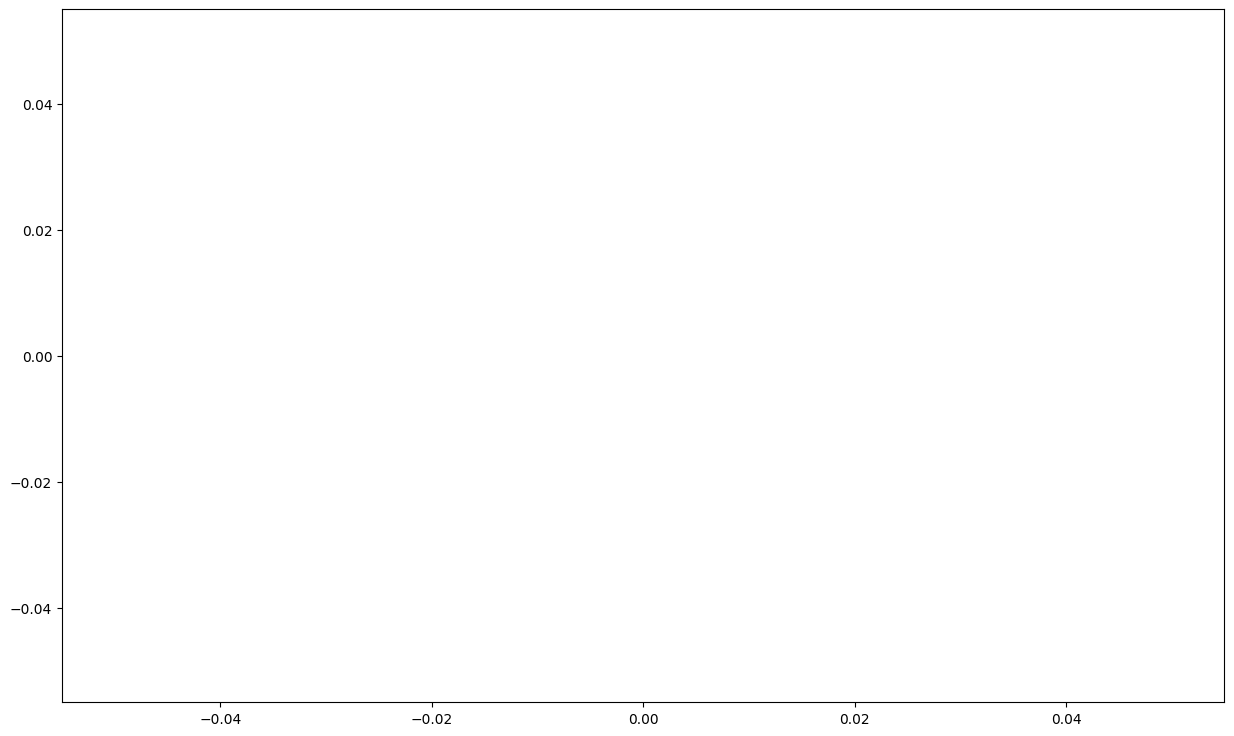

In [4]:
fig, ax = plt.subplots(figsize=(15, 9))
df1 = df[df['flag']==12]
df_max = df1[df1['target'] == df1['target'].max()]
ax.plot(
    df1['light'],
    df1['target'],
)
ax.scatter(
    df_max['light'],
    df_max['target'],
    c='r',
)
max_value = df_max['target'].iloc[0]
max_light = df_max['light'].iloc[0]
print(f'Max value = {max_value:.2E}\nLight     = {max_light:.2E}')


df1 = df[df['flag']==1]
df1 = df1.sort_values(by='light')
df_max = df1[df1['target'] == df1['target'].max()]
ax.plot(
    df1['light'],
    df1['target'],
)
ax.scatter(
    df_max['light'],
    df_max['target'],
    c='r',
)
max_value = df_max['target'].iloc[0]
max_light = df_max['light'].iloc[0]
print(f'Max value = {max_value:.2E}\nLight     = {max_light:.2E}')

ax.set_xlabel('light')
ax.set_ylabel('integral: $0 - 10^{-4}$')
scal_form = ScalarFormatter(1)
scal_form.set_powerlimits((0, 0.1))
ax.xaxis.set_major_formatter(scal_form)